In [16]:
import numpy as np 
import matplotlib.pyplot as plt
from openpmd_viewer import OpenPMDTimeSeries
from scipy.constants import micro, nano, pi

In [17]:
sigmaz = 100*micro
sigmax = 210*nano
sigmay = 3.1*nano
npart = 6.24e9
n0 = npart / (sigmax * sigmay * sigmaz * (2.*pi)**(3./2.))

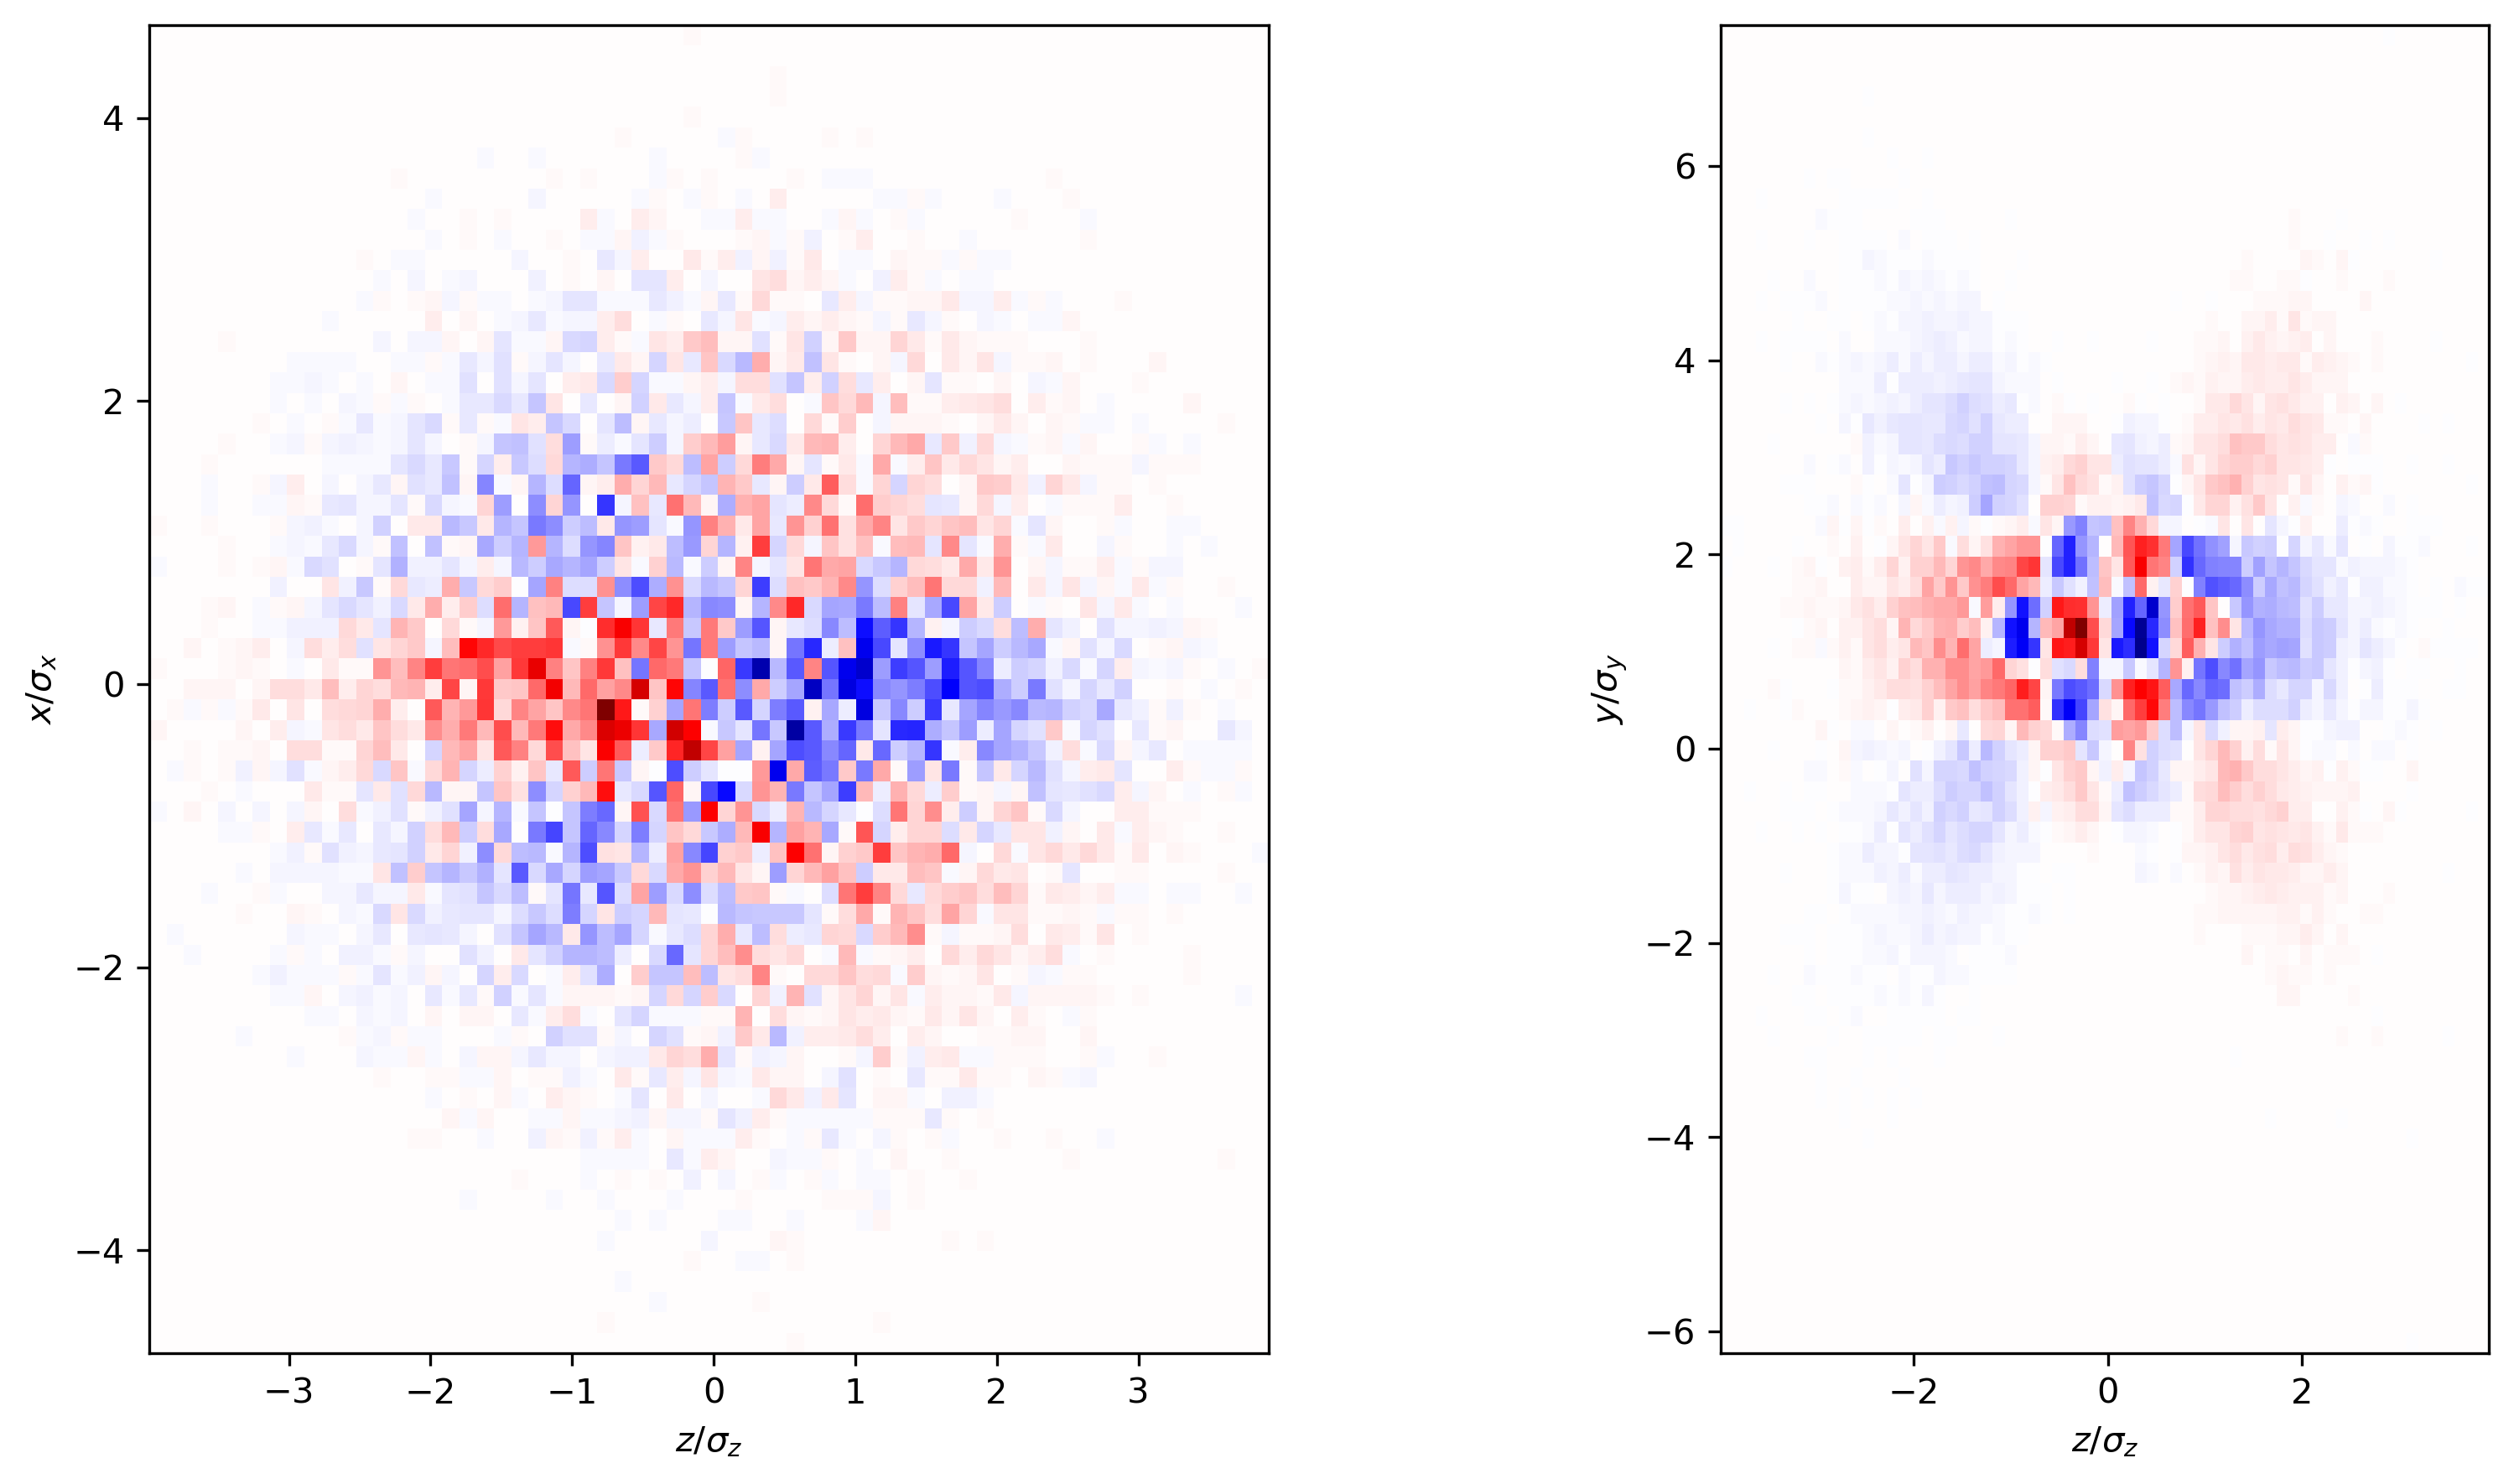

In [26]:
diag_dir = "diags/trajs"
series = OpenPMDTimeSeries(diag_dir)
iterations = series.iterations
N_steps = len(iterations)

it = iterations[int(0.5*N_steps)]

x1,y1,z1,w1 = series.get_particle(['x','y','z','w'], species='beam1', iteration=it)
x2,y2,z2,w2 = series.get_particle(['x','y','z','w'], species='beam2', iteration=it)
w1 = -w1
X = np.hstack((x1,x2))
Y = np.hstack((y1,y2))
Z = np.hstack((z1,z2))
W = np.hstack((w1,w2))

H_zx, bx, bz = np.histogram2d(X, Z, bins=(65,65), weights=W)
H_zy, by, bz = np.histogram2d(Y, Z, bins=(65,65), weights=W)


extent_zx = [bz[0]/sigmaz, bz[-1]/sigmaz, bx[0]/sigmax, bx[-1]/sigmax]
extent_zy = [bz[0]/sigmaz, bz[-1]/sigmaz, by[0]/sigmay, by[-1]/sigmay]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6), dpi=300)

ax[0].imshow(H_zx, extent=extent_zx, cmap='seismic', vmin=-H_zx.max(), vmax=H_zx.max())
ax[1].imshow(H_zy, extent=extent_zy, cmap='seismic', vmin=-H_zy.max(), vmax=H_zy.max())

ax[0].set_xlabel(r"$z/\sigma_z$")
ax[1].set_xlabel(r"$z/\sigma_z$")

ax[0].set_ylabel(r"$x/\sigma_x$")
ax[1].set_ylabel(r"$y/\sigma_y$")

fig.tight_layout()
plt.show()